# Feature Selection

Source: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e  
Extra Tree Classifier is used for extracting the top 10 features for the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
dataset = pd.read_csv('safety_dataset_new.csv')

X = dataset.drop(['label', 'bookingID'], axis=1)
y = dataset.label

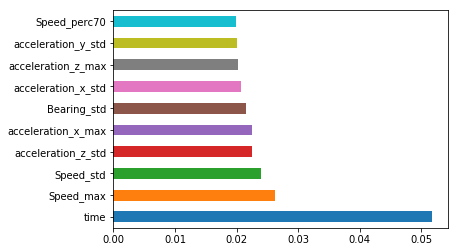

In [4]:
model = ExtraTreesClassifier()
model.fit(X,y)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From the above chart, we can make a few observations:
- The **time** of the trip is especially important
- The standard deviation for **acceleration** x, y, z are very important
- The maximum, standard deviation and 70th percentile of **Speed** are very important
- The standard deviation of **Bearing** is very important

**Explanation**  
The selected features make sense, as dangerous trips are often described by trips with very high or varying speeds and varying accelerations (suddenly braking or moving). Bearing refers to the relationship between two locations. If the bearing of the trip varies a lot, this means that the vehicle is changing directions very often, and that could mean that the driver is driving dangerously.

We will create a new dataframe with the above features and see what the result of the model will be

In [8]:
filtered_dataset = dataset[['bookingID',
                            'Speed_perc70',
                            'acceleration_x_min',
                            'acceleration_z_std',
                            'Bearing_std',
                            'acceleration_x_std',
                            'Speed_std',
                            'acceleration_y_std',
                            'acceleration_z_max',
                            'Speed_max',
                            'time',
                            'label'
                            ]]

In [9]:
filtered_dataset.head()

,bookingID,Speed_perc70,acceleration_x_min,acceleration_z_std,Bearing_std,acceleration_x_std,Speed_std,acceleration_y_std,acceleration_z_max,Speed_max,time,label
0,0,14.473692,-4.692294,1.141266,129.231351,0.928022,7.199919,0.639934,2.318857,22.946083,1589.0,0
1,1,12.118372,-5.352994,0.854271,89.861236,0.744157,7.059362,0.533915,1.481293,21.882141,1034.0,1
2,2,5.038032,-2.971295,1.020021,119.316520,0.756589,2.897762,0.505693,2.312870,9.360483,825.0,1
3,4,8.217000,-2.866458,0.779529,71.273774,0.527220,5.595901,0.598023,0.296381,19.780001,1094.0,1
4,6,7.770113,-4.352792,0.942163,111.868249,0.826271,5.314844,0.617210,7.977724,16.394695,1094.0,0


In [10]:
filtered_dataset.to_csv("safety_dataset_filtered.csv", index=False)